### How to Visualize Filters and Feature Maps in Convolutional Neural Networks

Convolutional neural networks, have internal structures that are designed to operate upon two-dimensional image data, and as such preserve the spatial relationships for what was learned by the model.

### load and summarize the VGG16 model

In [2]:
from keras.applications.vgg16 import VGG16   # load vgg model
model = VGG16()   # load the model

In [3]:
model.summary()   # summarize the model

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

### How to Visualize Filters

In [4]:
# summarize filter shapes
for layer in model.layers:

# check for convolutional layer
 if 'conv' not in layer.name:
  continue

Each convolutional layer has two sets of weights.

In [5]:
# get filter weights
filters, biases = layer.get_weights()
print(layer.name, filters.shape)

predictions (4096, 1000)


Summarize filters in each convolutional layer

In [6]:
# summarize filters in each convolutional layer
from keras.applications.vgg16 import VGG16
from matplotlib import pyplot

model = VGG16()   # load the model

In [7]:
# summarize filter shapes
for layer in model.layers:

# check for convolutional layer
 if 'conv' not in layer.name:
  continue

In [9]:
# get filter weights
filters, biases = layer.get_weights()
print(layer.name, filters.shape)

predictions (4096, 1000)


In [11]:
# retrieve weights from the second hidden layer
filters, biases = model.layers[1].get_weights()

In [12]:
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

Plot each filter as a new row of subplots, and each filter channel or depth as a new column.

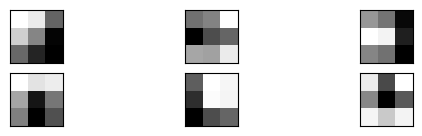

In [16]:
# plot first few filters
n_filters, ix = 6, 1
for i in range(n_filters):
 f = filters[:, :, :, i]  # get the filter
 for j in range(3):       # plot each channel separately
    ax = pyplot.subplot(n_filters, 3, ix)  # specify subplot and turn of axis
    ax.set_xticks([])
    ax.set_yticks([])
 pyplot.imshow(f[:, :, j], cmap='gray')  # plot filter channel in grayscale
 ix += 1
pyplot.show()   # show the figure

----

### How to Visualize Feature Maps

In [17]:
# summarize feature map size for each conv layer
from keras.applications.vgg16 import VGG16
from matplotlib import pyplot

model = VGG16()   # load the model
for i in range(len(model.layers)):    # summarize feature map shapes
 layer = model.layers[i]
 if 'conv' not in layer.name:    # check for convolutional layer
   continue

# summarize output shape
print(i, layer.name, layer.output.shape)

22 predictions (None, 1000)


In [19]:
from tensorflow.keras.models import Model

# redefine model to output right after the first hidden layer
model = Model(inputs=model.inputs, outputs=model.layers[1].output)

In [30]:
from tensorflow.keras.preprocessing.image import load_img

# load the image with the required shape
img = load_img('/content/bird.jpg', target_size=(224, 224))

In [31]:
from tensorflow.keras.preprocessing.image import img_to_array
import tensorflow as tf

img = img_to_array(img)   # convert the image to an array
img = tf.expand_dims(img, axis=0)   # expand dimensions so that it represents a single 'sample'

In [36]:
from tensorflow.keras.applications.vgg16 import preprocess_input

img = preprocess_input(img)  # Assuming `img` is your image array
feature_maps = model.predict(img)   # get feature map for first hidden layer

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


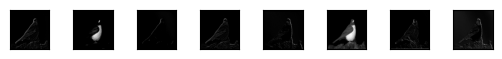

In [37]:
# plot all 64 maps in an 8x8 squares
square = 8
ix = 1
for _ in range(square):
 for _ in range(square):
    ax = pyplot.subplot(square, square, ix)  # specify subplot and turn of axis
    ax.set_xticks([])
    ax.set_yticks([])

 pyplot.imshow(feature_maps[0, :, :, ix-1], cmap='gray')  # plot filter channel in grayscale
 ix += 1
pyplot.show() # show the figure



---


### New model
We can define a new model that has multiple outputs, one feature map output for each of the last convolutional layer in each block; for example:

In [42]:
print(len(model.layers))

2


In [40]:
from tensorflow.keras.models import Model

# Assuming 'model' is already defined and has only 2 layers
ixs = [0, 1]  # Valid indices for a model with 2 layers

# Collect outputs for the valid layer indices
outputs = [model.layers[i].output for i in ixs]

# Create the new model with these outputs
model = Model(inputs=model.inputs, outputs=outputs)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,792 (7.00 KB)

 Trainable params: 1,792 (7.00 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
print(fmap.shape)

(224, 224, 64)


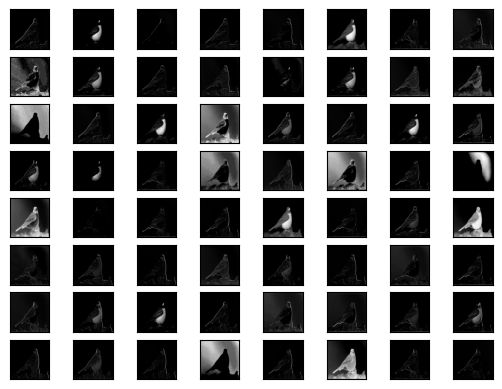

In [45]:
from matplotlib import pyplot

square = 8  # Number of squares in one row and column
for fmap in feature_maps:
    ix = 1  # Plot all feature maps in an 8x8 grid
    for _ in range(square):
        for _ in range(square):
            ax = pyplot.subplot(square, square, ix)  # Specify subplot and turn off axis
            ax.set_xticks([])
            ax.set_yticks([])
            # Plot filter channel in grayscale
            ax.imshow(fmap[:, :, ix-1], cmap='gray')
            ix += 1
    pyplot.show()  # Show the figure

Reference: https://machinelearningmastery.com/how-to-visualize-filters-and-feature-maps-in-convolutional-neural-networks/